In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from __future__ import division

In [184]:
# Reading the file
sample=pd.read_csv('C:/Users/Bilal/Desktop/The Platform ML/Dataset/2-X-Axis GroupB.txt', names = ["x1", "x2", "y1", "y2"],encoding = "ISO-8859-1")  
sample=sample.drop(['x2','y1','y2'], axis=1)
fmt = ",".join(["%s"] + ["%10.6e"] * (sample.shape[1]-1))

# Creating infected label
#uncomment for good samples
infected = np.ones((sample.size,1), order='C')

#uncomment for bad samples
#infected = np.zeros((sample.size,1), order='C')


#Power Spectrum
ps = np.abs(np.fft.fft(sample))**2

#Frequency Spectrum
time_step = 1 / 200
freqs = np.fft.fftfreq(sample.size, time_step)
freqs=freqs.reshape(sample.size,1)
idx = np.argsort(freqs)

#plt.plot(freqs[idx], ps[idx])
sample = pd.DataFrame(np.hstack((sample,ps,freqs,infected)),columns = ["x1", "ps","freqs","infected"])

# Handle Missing values
#uncomment for good samples
#sample[['x1','ps','freqs']] = sample[['x1','ps','freqs',]].replace(0, np.NaN)

# Uncomment for bad samples
sample[['x1','ps','freqs','infected']] = sample[['x1','ps','freqs','infected']].replace(0, np.NaN)

sample.dropna(inplace=True)


# Save
sample.to_csv('Samples/Good/good7.csv')

# Display
sample

,x1,ps,freqs,infected
1,579.0,335241.0,0.000060,1.0
2,579.0,335241.0,0.000119,1.0
3,576.0,331776.0,0.000179,1.0
4,575.0,330625.0,0.000238,1.0
5,576.0,331776.0,0.000298,1.0
6,576.0,331776.0,0.000357,1.0
7,578.0,334084.0,0.000417,1.0
8,574.0,329476.0,0.000476,1.0
9,574.0,329476.0,0.000536,1.0
10,577.0,332929.0,0.000595,1.0


In [ ]:
#Bad 1 - 9 = bad 1-9
#FarmADXL_1-5 = bad 10-14
# 1-X-Axis GroupA - 3-X-Axis GroupA = bad 15 - 17 
# 1-Y-Axis GroupA - 3-Y-Axis GroupA = bad 18 - 20 
# Good1 - Good5 = good 1 - 5 
# 1-X-Axis GroupB - 2-X-Axis GroupB = good 6 - 7

In [38]:
import glob
import pandas as pd
import os

path = r'C:\Users\Bilal\Samples\Train'                     # use your path
all_files = glob.glob(os.path.join(path, "*.csv"))     # advisable to use os.path.join as this makes concatenation OS independent

df_from_each_file = (pd.read_csv(f) for f in all_files)
concatenated_df   = pd.concat(df_from_each_file, ignore_index=True)
concatenated_df.to_csv('Samples/Bad/combined.csv')
concatenated_df=concatenated_df.drop(['Unnamed: 0'],axis=1)

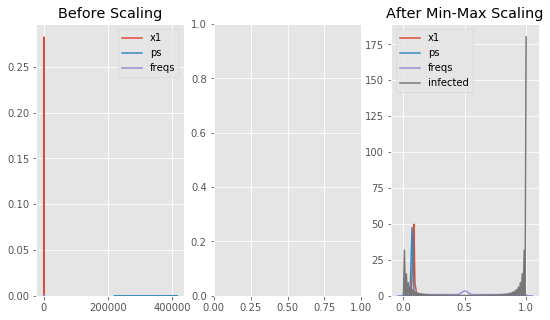

In [39]:
#concatenated_df=concatenated_df.drop(['Unnamed: 0'],axis=1)
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.style.use('ggplot')

x=concatenated_df


scaler = preprocessing.MinMaxScaler()
minmax_scaled_df = scaler.fit_transform(x)
minmax_scaled_df = pd.DataFrame(minmax_scaled_df, columns=['x1', 'ps','freqs','infected'])

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(9, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(x['x1'], ax=ax1)
sns.kdeplot(x['ps'], ax=ax1)
sns.kdeplot(x['freqs'], ax=ax1)
ax3.set_title('After Min-Max Scaling')
sns.kdeplot(minmax_scaled_df['x1'], ax=ax3)
sns.kdeplot(minmax_scaled_df['ps'], ax=ax3)
sns.kdeplot(minmax_scaled_df['freqs'], ax=ax3)
sns.kdeplot(minmax_scaled_df['infected'], ax=ax3)
plt.show()


In [33]:
minmax_scaled_df

,x1,ps,freqs,infected
0,0.182648,0.153221,0.500001,1.0
1,0.168950,0.141273,0.500001,1.0
2,0.164384,0.137307,0.500002,1.0
3,0.173516,0.145247,0.500003,1.0
4,0.173516,0.145247,0.500003,1.0
5,0.178082,0.149230,0.500004,1.0
6,0.178082,0.149230,0.500005,1.0
7,0.187215,0.157220,0.500005,1.0
8,0.173516,0.145247,0.500006,1.0
9,0.173516,0.145247,0.500007,1.0


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric import smoothers_lowess
from pandas import Series, DataFrame
from patsy import dmatrices
from sklearn import datasets, svm
#from KaggleAux import predict as ka # see github.com/agconti/kaggleaux for more details

Text(0.5,1,'Infection Breakdown (1 = Infected, 0 = Died)')

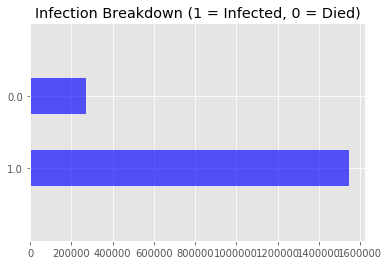

In [40]:
df=concatenated_df
plt.figure(figsize=(6,4))
fig, ax = plt.subplots()
df.infected.value_counts().plot(kind='barh', color="blue", alpha=.65)
ax.set_ylim(-1, len(df.infected.value_counts())) 
plt.title("Infection Breakdown (1 = Infected, 0 = Died)")

In [12]:
# model formula
# here the ~ sign is an = sign, and the features of our dataset
# are written as a formula to predict survived. The C() lets our 
# regression know that those variables are categorical.
# Ref: http://patsy.readthedocs.org/en/latest/formulas.html
formula = 'infected ~ C(x1) + C(ps) + C(freqs)' 
# create a results dictionary to hold our regression results for easy analysis later        
results = {} 

In [51]:
# create a regression friendly dataframe using patsy's dmatrices function
y,x = dmatrices(formula, data=new_df, return_type='dataframe')

# instantiate our model
model = sm.Logit(y,x)

# fit our model to the training data
res = model.fit()
'''
# save the result for outputing predictions later
results['Logit'] = [res, formula]
res.summary()
'''

PerfectSeparationError: Perfect separation detected, results not available

In [47]:
new_df=concatenated_df[:1000] #keep top 3
new_df

,x1,ps,freqs,infected
0,486.0,236196.0,0.002458,1.0
1,483.0,233289.0,0.004915,1.0
2,482.0,232324.0,0.007373,1.0
3,484.0,234256.0,0.009830,1.0
4,484.0,234256.0,0.012288,1.0
5,485.0,235225.0,0.014745,1.0
6,485.0,235225.0,0.017203,1.0
7,487.0,237169.0,0.019660,1.0
8,484.0,234256.0,0.022118,1.0
9,484.0,234256.0,0.024575,1.0
